## <font color="chillipepper">**Setup and Data Loading**</font>

In [1]:
import pandas as pd
import datetime
from datetime import datetime
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
%pwd

'c:\\Users\\omarh\\OneDrive\\Desktop\\To do\\Projects\\SalesForecast\\research'

In [3]:
# read the historical sales dataset

sales_df = pd.read_csv("data\\sales.csv", low_memory=False)

## <font color="chillipepper">**Data Exploration and Feature Understanding**</font>

In [5]:
# check the info of the dataset
print("Shape:", sales_df.shape)
sales_df.info()

Shape: (1017209, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
# nunique values

print("Distinct values in Store: ", sales_df['Store'].unique())
print("Distinct values in DayOfWeek: ", sales_df['DayOfWeek'].unique())
print("Distinct values in State Holiday: ", sales_df['StateHoliday'].unique())
print("Distinct values in SchoolHoliday: ", sales_df['SchoolHoliday'].unique())
print("Distinct values in Promo", sales_df['Promo'].unique())
print("Distinct values in Open", sales_df['Open'].unique())

Distinct values in Store:  [   1    2    3 ... 1113 1114 1115]
Distinct values in DayOfWeek:  [5 4 3 2 1 7 6]
Distinct values in State Holiday:  ['0' 'a' 'b' 'c']
Distinct values in SchoolHoliday:  [1 0]
Distinct values in Promo [1 0]
Distinct values in Open [1 0]


In [8]:
# counting no-sales observation
print(sales_df['Sales'][sales_df['Sales'] == 0].count())

172871


In [9]:
sales_df = sales_df.loc[sales_df['Sales'] > 0]

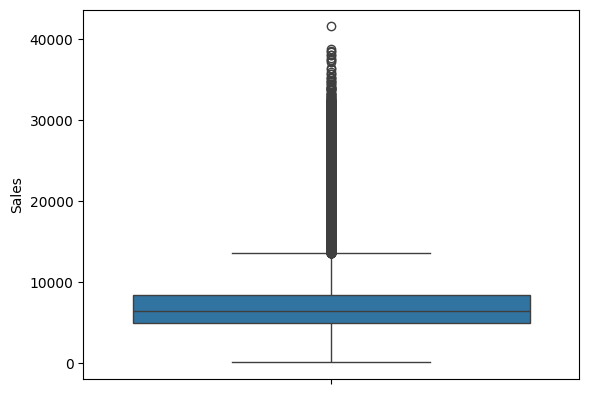

In [10]:
# box-plot for sales-outliers
sns.boxplot(y="Sales", data = sales_df)
plt.show()

In [11]:
# calculating Sales values at each percentile (0, 10, 20, ..., 100)

percentiles = np.percentile(sales_df["Sales"], np.arange(0, 110, 10))
for p, v in zip(range(0, 110, 10), percentiles):
    print(f"{p}th percentile: {v}")

0th percentile: 46.0
10th percentile: 3762.0
20th percentile: 4537.0
30th percentile: 5165.0
40th percentile: 5758.0
50th percentile: 6369.0
60th percentile: 7056.0
70th percentile: 7867.0
80th percentile: 8958.0
90th percentile: 10771.0
100th percentile: 41551.0


In [12]:
# calculating Sales values at each percentile (90, 91, ..., 100)

percentiles = np.arange(90, 101)
percentile_values = np.percentile(sales_df["Sales"], percentiles)
for p, v in zip(percentiles, percentile_values):
    print(f"{p}th percentile value is {v}")

90th percentile value is 10771.0
91th percentile value is 11052.0
92th percentile value is 11360.0
93th percentile value is 11722.0
94th percentile value is 12148.0
95th percentile value is 12668.0
96th percentile value is 13330.0
97th percentile value is 14209.0
98th percentile value is 15509.0
99th percentile value is 17789.0
100th percentile value is 41551.0


In [13]:
# calculating Sales values at each percentile (99.0, 99.1, ...,100)

percentiles = np.arange(99.0, 100.1, 0.1)
percentile_values = np.percentile(sales_df["Sales"], percentiles)
for p, v in zip(percentiles, percentile_values):
    print(f"{p:.1f}th percentile value is {v}")

99.0th percentile value is 17789.0
99.1th percentile value is 18137.933999999892
99.2th percentile value is 18494.303999999887
99.3th percentile value is 18903.640999999945
99.4th percentile value is 19362.0
99.5th percentile value is 19908.31499999971
99.6th percentile value is 20568.0
99.7th percentile value is 21402.966999998782
99.8th percentile value is 22571.303999998607
99.9th percentile value is 24669.303999995813
100.0th percentile value is 41550.999998682644


In [14]:
sales_df = sales_df[sales_df['Sales'] <= 24680]

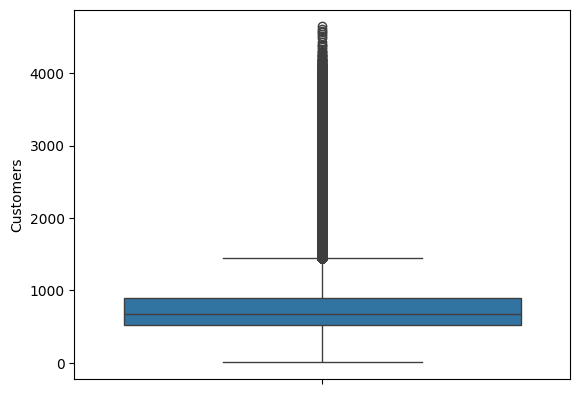

In [15]:
# box-plot to Customers variable
sns.boxplot(y="Customers", data = sales_df)
plt.show()

In [16]:
# calculating Customers values at each percentile (0, 10, 20, ..., 100)

percentiles = np.percentile(sales_df["Customers"], np.arange(0, 110, 10))
for p, v in zip(range(0, 110, 10), percentiles):
    print(f"{p}th percentile: {v}")

0th percentile: 8.0
10th percentile: 408.0
20th percentile: 486.0
30th percentile: 550.0
40th percentile: 611.0
50th percentile: 675.0
60th percentile: 748.0
70th percentile: 838.0
80th percentile: 958.0
90th percentile: 1174.0
100th percentile: 4645.0


In [17]:
# calculating Customers values at each percentile (90, 91, ..., 100)

percentiles = np.arange(90, 101)
percentile_values = np.percentile(sales_df["Customers"], percentiles)
for p, v in zip(percentiles, percentile_values):
    print(f"{p}th percentile value is {v}")

90th percentile value is 1174.0
91th percentile value is 1209.0
92th percentile value is 1250.0
93th percentile value is 1299.0
94th percentile value is 1358.0
95th percentile value is 1432.0
96th percentile value is 1531.0
97th percentile value is 1670.0
98th percentile value is 1889.0
99th percentile value is 2351.0
100th percentile value is 4645.0


In [18]:
# calculating Customers values at each percentile (99.0, 99.1, ...,100)

percentiles = np.arange(99.0, 100.1, 0.1)
percentile_values = np.percentile(sales_df["Customers"], percentiles)
for p, v in zip(percentiles, percentile_values):
    print(f"{p:.1f}th percentile value is {v}")

99.0th percentile value is 2351.0
99.1th percentile value is 2430.0
99.2th percentile value is 2519.0
99.3th percentile value is 2620.0
99.4th percentile value is 2747.0
99.5th percentile value is 2894.0
99.6th percentile value is 3043.0
99.7th percentile value is 3178.0
99.8th percentile value is 3326.0
99.9th percentile value is 3509.0
100.0th percentile value is 4644.9999999855645


In [19]:
sales_df = sales_df[(sales_df.Customers <= 3600)]

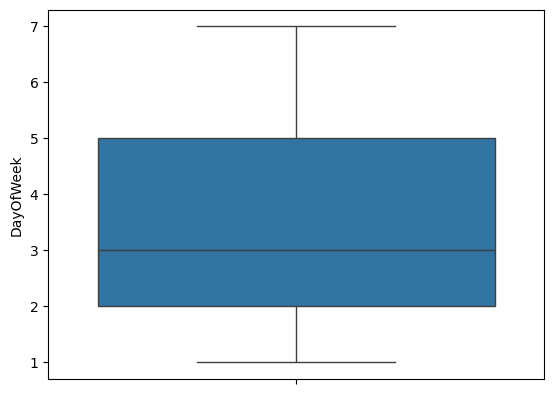

In [20]:
# box-plot for DayOfWeek variable
sns.boxplot(y="DayOfWeek", data = sales_df)
plt.show()

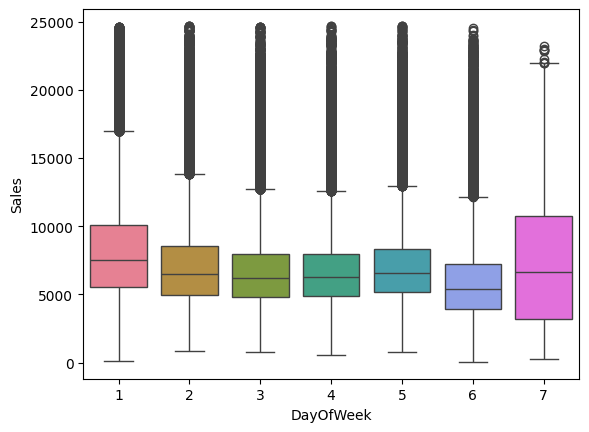

In [21]:
# box-plot for Sales by DayOfWeek 1-7
colors = sns.color_palette("husl", 7)
sns.boxplot(x='DayOfWeek', y='Sales', hue='DayOfWeek', data=sales_df, palette=colors, legend=False)
plt.show()

In [22]:
# StateHoliday varibale
sales_df['StateHoliday'].value_counts()

StateHoliday
0    842056
a       675
b       137
c        68
Name: count, dtype: int64

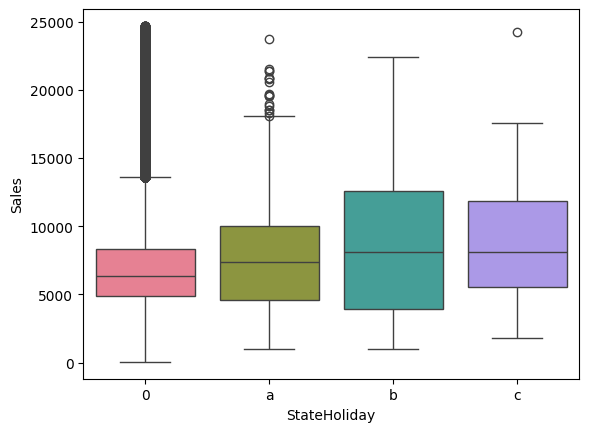

In [23]:
# box-plot for Sales on StateHolidays (a=public_holiday, b=Easter_holiday, c=Christmas)
colors = sns.color_palette("husl", 4)
sns.boxplot(x='StateHoliday', y='Sales', hue='StateHoliday', data=sales_df, palette=colors)
plt.show()

In [24]:
# SchoolHoliday variable
sales_df['SchoolHoliday'].value_counts()

SchoolHoliday
0    679754
1    163182
Name: count, dtype: int64

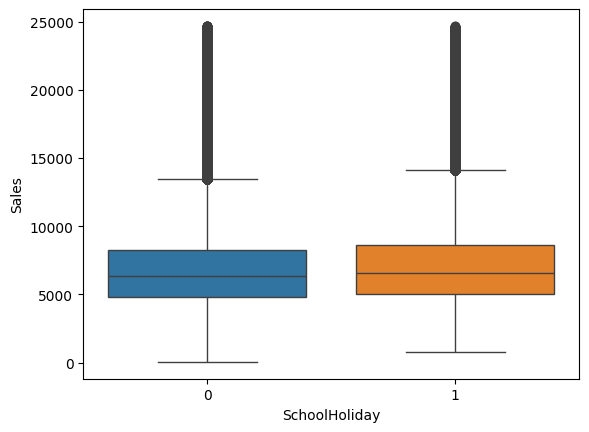

In [25]:
# box-plot for Sales by SchoolHoliday
colors = sns.color_palette("husl", 2)
sns.boxplot(x='SchoolHoliday', y='Sales', hue='SchoolHoliday', data=sales_df, legend=False)
plt.show()

In [26]:
# Date variable
min(sales_df['Date'].unique()), max(sales_df['Date'].unique())

('2013-01-01', '2015-07-31')

In [27]:
# Promo variable
sales_df['Promo'].value_counts()

Promo
0    466924
1    376012
Name: count, dtype: int64

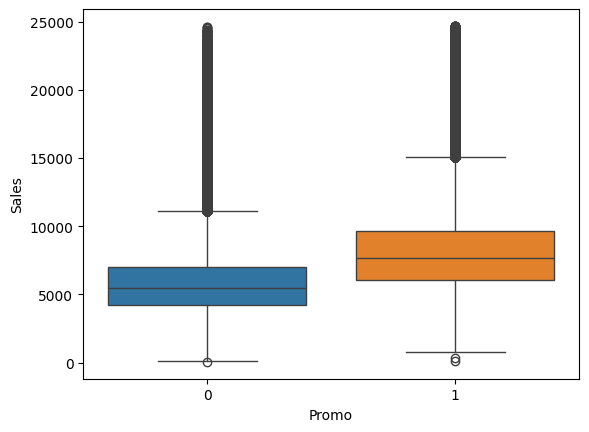

In [28]:
# box-plot for Promo impact on Sales
colors = sns.color_palette("husl", 2)
sns.boxplot(x='Promo', y='Sales', hue='Promo', data=sales_df, legend=False)
plt.show()

In [29]:
# Open variable
sales_df['Open'].value_counts()

Open
1    842936
Name: count, dtype: int64

In [30]:
sales_df['Sales'].describe()

count    842936.000000
mean       6927.876838
std        3019.939416
min          46.000000
25%        4857.000000
50%        6363.000000
75%        8346.000000
max       24680.000000
Name: Sales, dtype: float64

*Sales Data Analysis*

* There are no null data found in any of the columns. Date, StateHoliday are of type Object (encoding needed), and the remaining are int64.
* Min Sales and Max Sales are 0 and 4155. 16% of data has 0 Sales, as Store was closed on those days.
* More Sales reported on Sunday, seems store is closed on Saturday or no Sales.
* Outliers in Sales: 99.9 percentile of data is >= 24680.
* Outliers in Customers: 99.9 percentile of data is >= 3600.
* Promo applied on only 50% of data, a considerable impact of Promo on Sales.
* StateHoliday did affect Sales of Stores.
* Different StateHoliday applied on only 3% of data.
* SchoolHoliday applied on only 17% of data, has not much impact on Store Sales.

In [31]:
# read the store dataset
store_df = pd.read_csv("data\\store.csv")

# check the info of the dataset
print("Shape:", store_df.shape)
store_df.info()

Shape: (1115, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [32]:
# distinct Values in object-type features

print("Distinct values in StoreType: ", store_df['StoreType'].unique())
print("Distinct values in Assortment: ", store_df['Assortment'].unique())
print("Distinct values in PromoInterval: ", store_df['PromoInterval'].unique())
print("Distinct values in Promo2", store_df['Promo2'].unique())

Distinct values in StoreType:  ['c' 'a' 'd' 'b']
Distinct values in Assortment:  ['a' 'c' 'b']
Distinct values in PromoInterval:  [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Distinct values in Promo2 [0 1]


In [33]:
# CompetitionDistance variable
store_df[['Store','CompetitionDistance']][store_df['CompetitionDistance'].isnull()]

,Store,CompetitionDistance
290,291,NaN
621,622,NaN
878,879,NaN


In [34]:
# replace CompetitionDistance of null/NaN with the median value
store_df.loc[store_df["CompetitionDistance"].isnull(), "CompetitionDistance"] = store_df["CompetitionDistance"].median()

In [35]:
# CompetitionOpenSinceYear variable
store_df["CompetitionOpenSinceYear"].value_counts()

CompetitionOpenSinceYear
2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2009.0    54
2008.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: count, dtype: int64

In [37]:
store_df['CompetitionOpenSinceYear'][store_df['CompetitionOpenSinceYear'].isnull()]

11     NaN
12     NaN
15     NaN
18     NaN
21     NaN
        ..
1095   NaN
1099   NaN
1112   NaN
1113   NaN
1114   NaN
Name: CompetitionOpenSinceYear, Length: 354, dtype: float64

In [38]:
# CompetitionOpenSinceMonth variable
store_df["CompetitionOpenSinceMonth"].value_counts()

CompetitionOpenSinceMonth
9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: count, dtype: int64

In [39]:
store_df['CompetitionOpenSinceMonth'][store_df['CompetitionOpenSinceMonth'].isnull()]

11     NaN
12     NaN
15     NaN
18     NaN
21     NaN
        ..
1095   NaN
1099   NaN
1112   NaN
1113   NaN
1114   NaN
Name: CompetitionOpenSinceMonth, Length: 354, dtype: float64

In [40]:
# StoreType
store_df['StoreType'].value_counts()

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64

In [41]:
store_df['StoreType'][store_df['StoreType'].isnull()]

Series([], Name: StoreType, dtype: object)

In [42]:
# Assortment variable describes an assortment level: a = basic, b = extra, c = extended
store_df['Assortment'].value_counts()

Assortment
a    593
c    513
b      9
Name: count, dtype: int64

In [43]:
store_df['Assortment'][store_df['Assortment'].isnull()]

Series([], Name: Assortment, dtype: object)

In [45]:
# Promo2 variable
store_df['Promo2'].value_counts()

Promo2
1    571
0    544
Name: count, dtype: int64

In [46]:
store_df['Promo2'][store_df['Promo2'].isnull()]

Series([], Name: Promo2, dtype: int64)

In [47]:
# Promo2SinceWeek variable
store_df['Promo2SinceWeek'].value_counts()

Promo2SinceWeek
14.0    81
40.0    77
31.0    44
10.0    42
5.0     39
37.0    35
1.0     35
45.0    34
13.0    34
22.0    33
18.0    29
35.0    25
9.0     14
27.0    11
36.0    10
48.0     9
39.0     6
23.0     5
44.0     3
26.0     1
6.0      1
50.0     1
49.0     1
28.0     1
Name: count, dtype: int64

In [48]:
store_df['Promo2SinceWeek'][store_df['Promo2SinceWeek'].isnull()]

0      NaN
3      NaN
4      NaN
5      NaN
6      NaN
        ..
1107   NaN
1109   NaN
1111   NaN
1112   NaN
1113   NaN
Name: Promo2SinceWeek, Length: 544, dtype: float64

In [49]:
# Promo2SinceYear variable
store_df['Promo2SinceYear'].value_counts()

Promo2SinceYear
2011.0    128
2013.0    120
2014.0     95
2012.0     81
2009.0     73
2010.0     64
2015.0     10
Name: count, dtype: int64

In [50]:
store_df['Promo2SinceYear'][store_df['Promo2SinceYear'].isnull()]

0      NaN
3      NaN
4      NaN
5      NaN
6      NaN
        ..
1107   NaN
1109   NaN
1111   NaN
1112   NaN
1113   NaN
Name: Promo2SinceYear, Length: 544, dtype: float64

In [51]:
# PromoInterval variable
store_df['PromoInterval'].value_counts()

PromoInterval
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: count, dtype: int64

In [52]:
store_df['PromoInterval'][store_df['PromoInterval'].isnull()]

0       NaN
3       NaN
4       NaN
5       NaN
6       NaN
       ... 
1107    NaN
1109    NaN
1111    NaN
1112    NaN
1113    NaN
Name: PromoInterval, Length: 544, dtype: object

In [53]:
# Replace NaN/null values in CompetitionOpenSinceYear, CompetitionOpenSinceMonth, Promo2SinceYear, Promo2SinceWeek, PromoInterval with 0.
store_df.fillna(0, inplace=True)

In [54]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


*Store Data Analysis*

* CompetitionDistance is null/NaN for 3 stores.
* 354 stores don't have CompetitionOpenSinceMonth, CompetitionOpenSinceYear are defined, i.e., null/NaN; eventhoguh they have CompetitionDistance defined.
* 554 stores don't have Promo2SinceWeek, Promo2SinceYear, PromoInterval are defined i.e., null/NaN.
* Found NaN/null values in CompetitionOpenSinceYear, CompetitionOpenSinceMonth, Promo2SinceYear, Promo2SinceWeek, PromoInterval.

In [55]:
# merging Train Data with Store Data based on Store (Unique Id)

sales_store_df = pd.merge(sales_df, store_df, on='Store', how='left')
print("Shape:", sales_store_df.shape)
sales_store_df.info()

Shape: (842936, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842936 entries, 0 to 842935
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      842936 non-null  int64  
 1   DayOfWeek                  842936 non-null  int64  
 2   Date                       842936 non-null  object 
 3   Sales                      842936 non-null  int64  
 4   Customers                  842936 non-null  int64  
 5   Open                       842936 non-null  int64  
 6   Promo                      842936 non-null  int64  
 7   StateHoliday               842936 non-null  object 
 8   SchoolHoliday              842936 non-null  int64  
 9   StoreType                  842936 non-null  object 
 10  Assortment                 842936 non-null  object 
 11  CompetitionDistance        842936 non-null  float64
 12  CompetitionOpenSinceMonth  842936 non-null  float64
 13  Competiti

In [56]:
sales_store_df['Date'] = pd.to_datetime(sales_store_df['Date'], errors='coerce')

sales_store_df['Year'] = sales_store_df.Date.dt.year
sales_store_df['Month'] = sales_store_df.Date.dt.month
sales_store_df['Week'] = sales_store_df.Date.dt.isocalendar().week

In [ ]:
# Sorting Data by Date
sales_store_df = sales_store_df.sort_values(by='Date')

## <font color="chillipepper">**Univariate Analysis**</font>

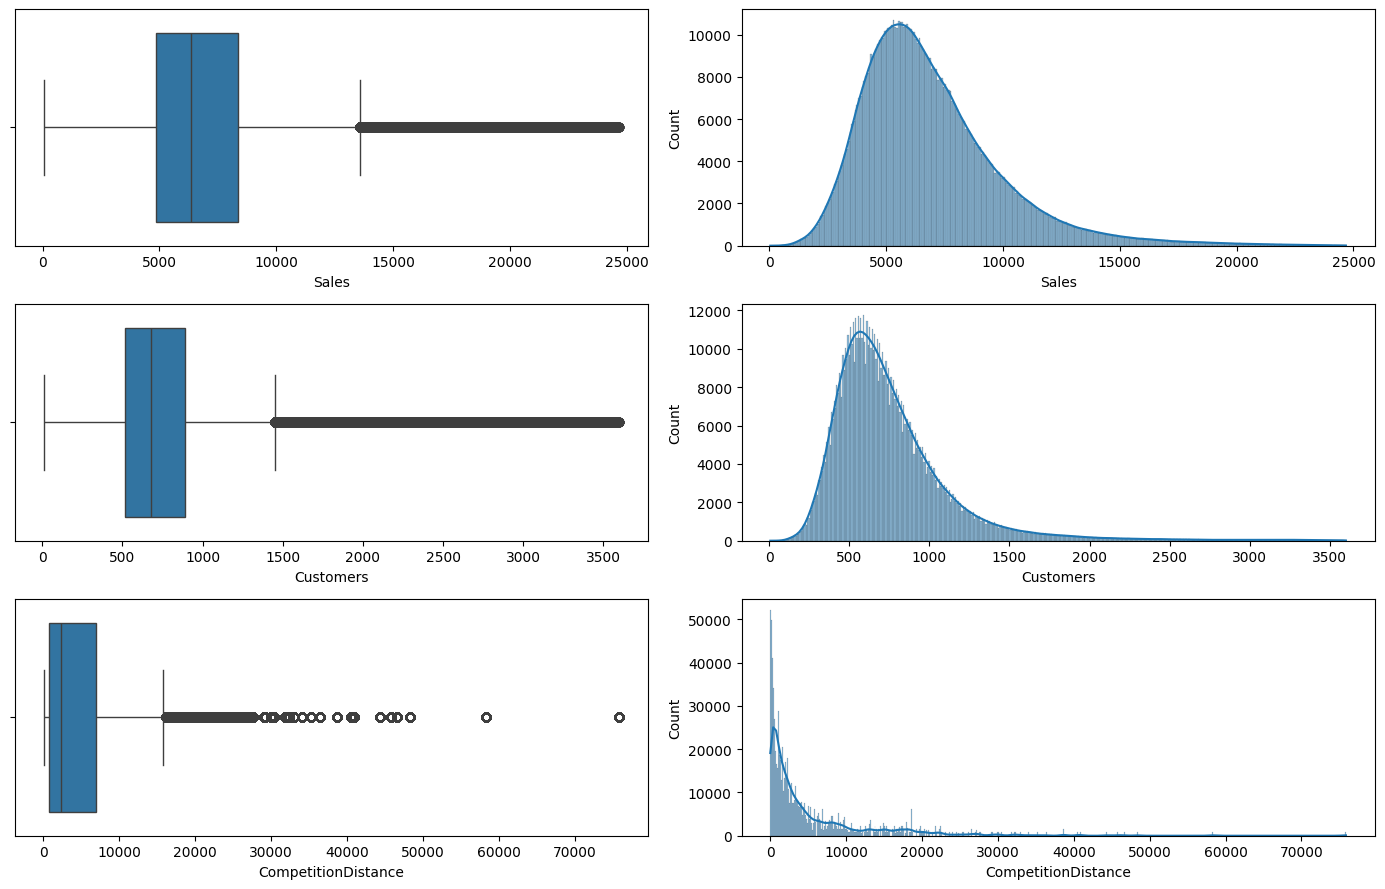

In [58]:
# univariate analysis on Sales, Customers, CompetitionDistance
fig, ax = plt.subplots(3, 2, figsize=(14, 9))

# Sales
sns.boxplot(x=sales_store_df['Sales'], ax=ax[0,0])
sns.histplot(sales_store_df['Sales'], kde=True, ax=ax[0,1])

# Customers
sns.boxplot(x=sales_store_df['Customers'], ax=ax[1,0])
sns.histplot(sales_store_df['Customers'], kde=True, ax=ax[1,1])

# CompetitionDistance
sns.boxplot(x=sales_store_df['CompetitionDistance'], ax=ax[2,0])
sns.histplot(sales_store_df['CompetitionDistance'], kde=True, ax=ax[2,1])

plt.tight_layout()
plt.show()

Observation:
* Sales data is distributed mostly between 3000 to 9000, Customers data is distributed mostly between 250 to 1100, and CompetitionDistance data is distributed mostly between 0 to 400, mostly right skewed.

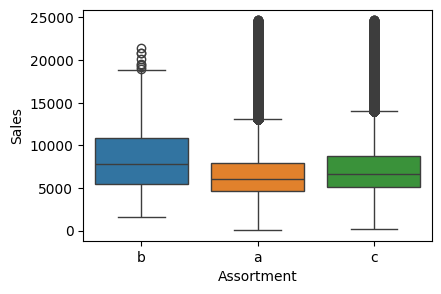

In [60]:
# univariate analysis using Box Plots

# box-plot for Sales by Assortment (a = basic, b = extra, c = extended)

colors = sns.color_palette("husl", 3)
plt.rcParams['figure.figsize'] = (4.5, 3.0)
sns.boxplot(x='Assortment', y='Sales', hue='Assortment', data=sales_store_df, legend=False)
plt.show()

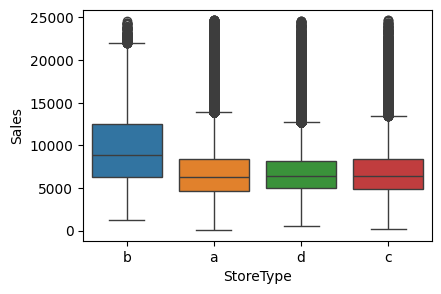

In [61]:
# box-plot for Sales by StoreType (a, b, c, d)
colors = sns.color_palette("husl", 4)
sns.boxplot(x='StoreType', y='Sales', hue='StoreType', data=sales_store_df)
plt.show()

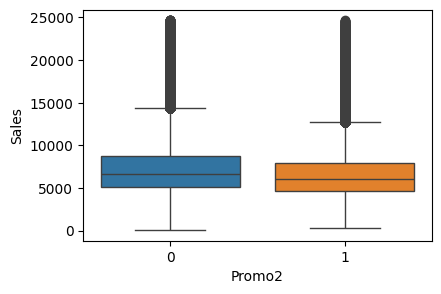

In [63]:
# box-plot for Sales vs Promo2
colors = sns.color_palette("husl", 2)
sns.boxplot(x='Promo2', y='Sales', hue='Promo2', data=sales_store_df, legend=False)
plt.show()

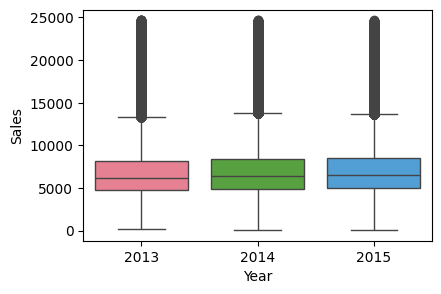

In [64]:
# box-plot for Sales by years
colors = sns.color_palette("husl", 3)
sns.boxplot(x='Year', y='Sales', hue='Year', data=sales_store_df, palette=colors, legend=False)
plt.show()

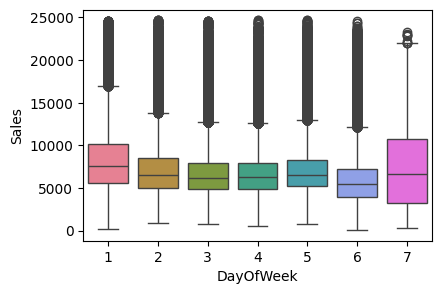

In [65]:
# box-plot for Sales by Days
colors = sns.color_palette("husl", 7)
sns.boxplot(x='DayOfWeek', y='Sales', hue='DayOfWeek', data=sales_store_df, palette=colors, legend=False)
plt.show()

## <font color="chillipepper">**Bi-Variate Analysis**</font>

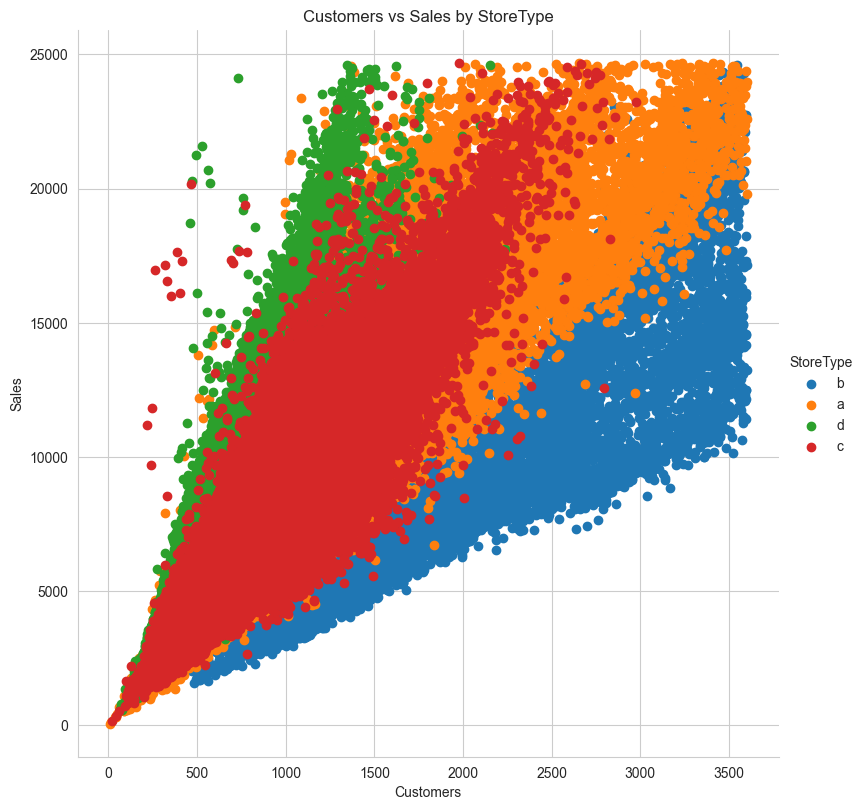

In [66]:
sns.set_style("whitegrid")
sns.FacetGrid(sales_store_df, hue='StoreType', height=8).map(plt.scatter, "Customers", "Sales").add_legend()
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.title(label="Customers vs Sales by StoreType")
plt.show()

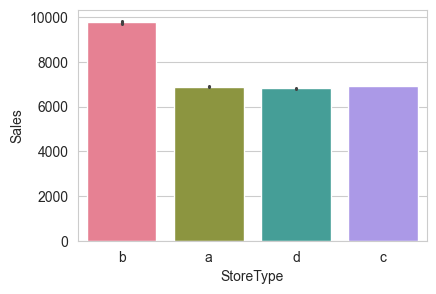

In [67]:
colors = sns.color_palette("husl", 4)
sns.barplot(x='StoreType', y='Sales', hue= 'StoreType', data=sales_store_df, palette=colors, legend=False)
plt.show()

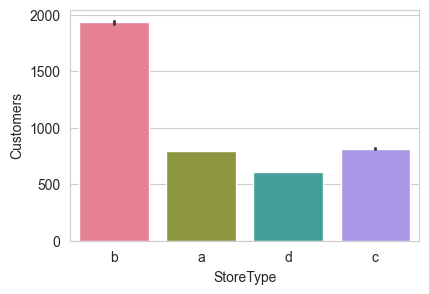

In [68]:
colors = sns.color_palette("husl", 4)
sns.barplot(x='StoreType', y='Customers', hue='StoreType', data=sales_store_df, palette=colors, legend=False)
plt.show()

Observations:
* Customers vs Sales by StoreType - As per below 1st graph, More Sales and Customers for StoreType b than d than a than c.
* As per 2nd graph, Sales are more for StoreType b, for other StoreTypes Sales are equal.
* As per 3rd graph, Customers are more for StoreType b, for other StoreType considerably less.

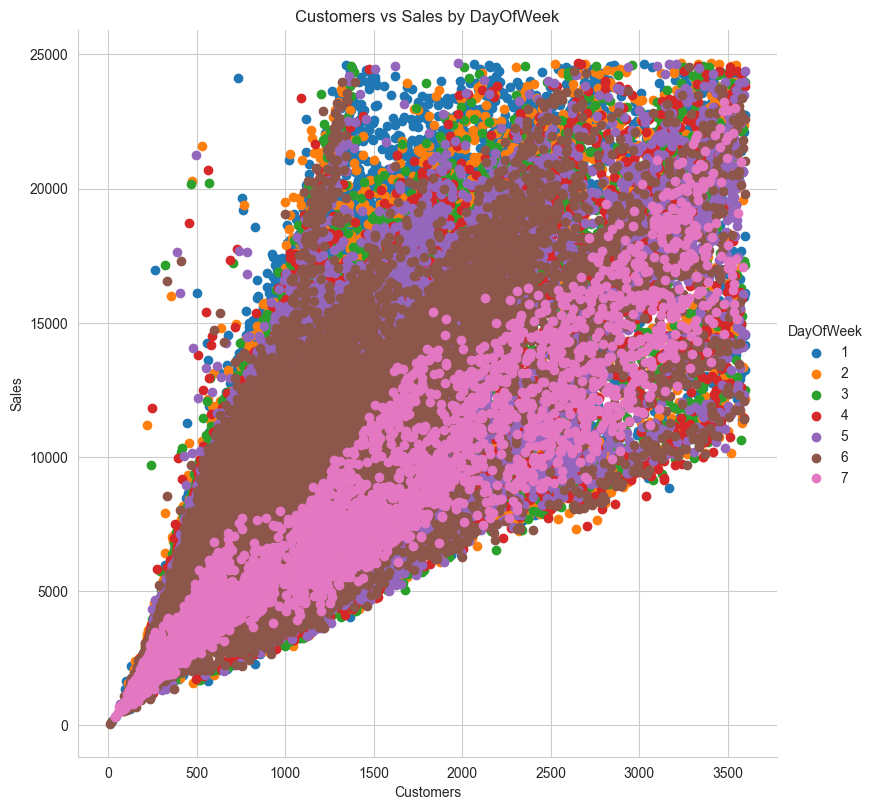

In [69]:
sns.set_style("whitegrid")
sns.FacetGrid(sales_store_df, hue='DayOfWeek', height=8).map(plt.scatter, "Customers", "Sales").add_legend()
plt.xlabel("Customers")
plt.ylabel("Sales")
plt.title(label="Customers vs Sales by DayOfWeek")
plt.show()

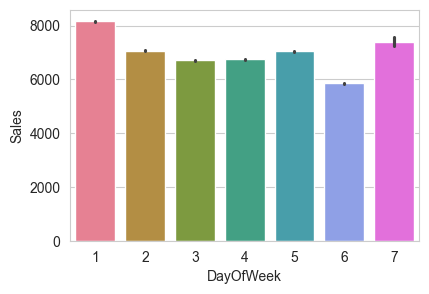

In [70]:
colors = sns.color_palette("husl", 7)
sns.barplot(x='DayOfWeek', y='Sales', hue='DayOfWeek', data=sales_store_df, palette=colors, legend=False)
plt.show()

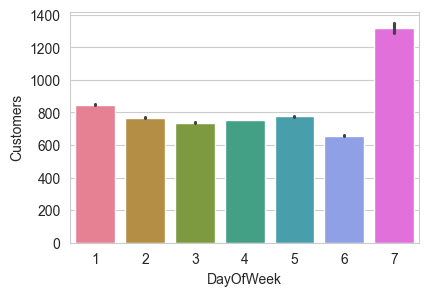

In [71]:
colors = sns.color_palette("husl", 7)
sns.barplot(x='DayOfWeek', y='Customers', hue='DayOfWeek', data=sales_store_df, palette=colors, legend=False)
plt.show()

Observations:
* Customers vs Sales by DayOfWeek - As per below 1st graph, observing more Sales and Customers on Friday and Saturday.
* As per below 2nd graph, Sales are more on Sunday and Saturday.
* As per below 3rd graph, Customer are more on Saturday.

We will stop here; but as follows, we can continue to analyze sales against other features using new criteria, each time interpreting the results to find more trends.

## <font color="chillipepper">**Multivariate Analysis**</font>

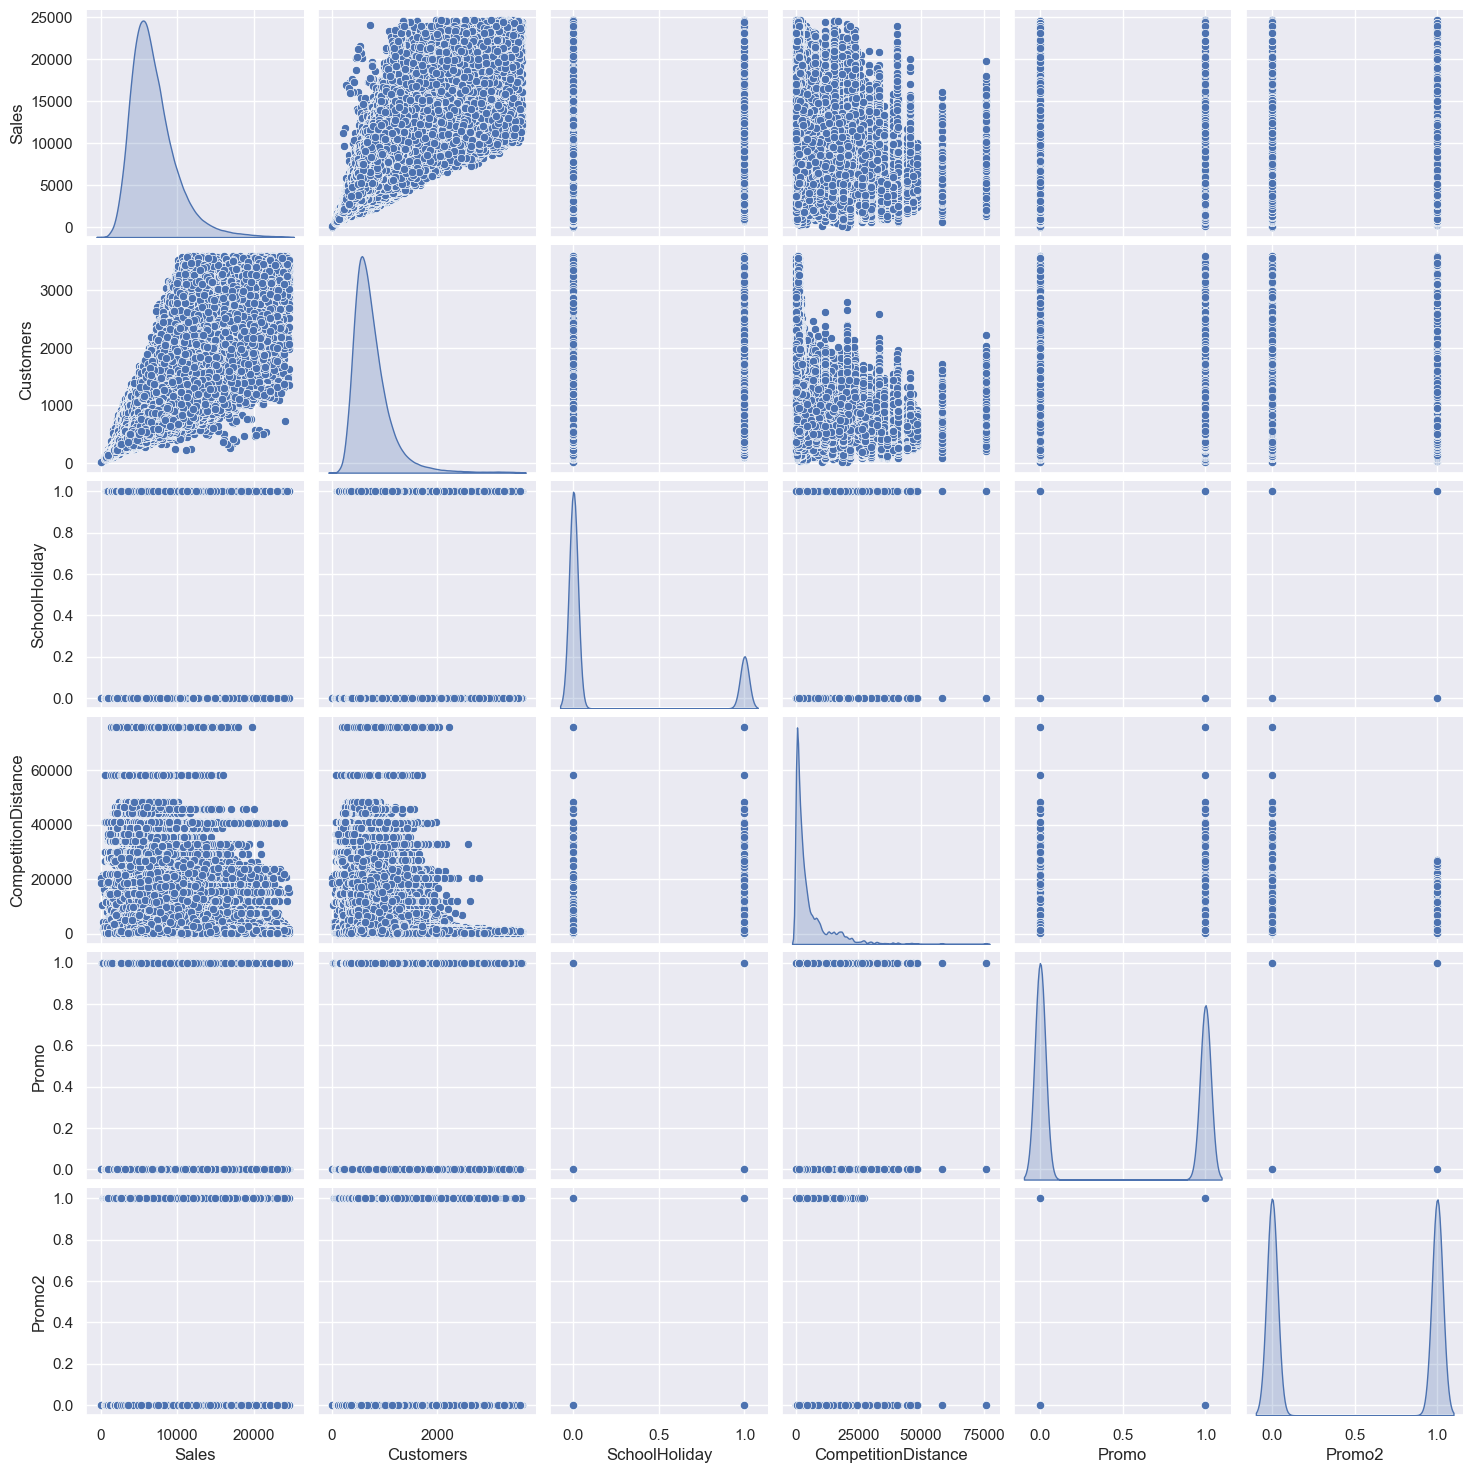

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
data_pair_df = sales_store_df[['Sales','Customers','StateHoliday','SchoolHoliday','StoreType','CompetitionDistance','Promo','Promo2']]
sns.pairplot(data_pair_df, diag_kind='kde')

Observations per Pairplot:
* Sales vs Customer: Sales and Customer are proportional to each other
* Sales vs CompetitionDistance: Sales more as the CompetitionDistance
* Sales vs Promo: Sales not much impacted by Promo
* Sales vs Promo2: Sales not much impacted by Promo2

In [73]:
data_y = sales_store_df['Sales']
data_X = sales_store_df.drop(['Sales', 'Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], axis=1)

In [74]:
sample_data_y = data_y.sample(n=5000, random_state=42)
sample_data_X = data_X.sample(n=5000, random_state=42)
print("the shape of sample data = ", sample_data_X.shape)

the shape of sample data =  (5000, 15)


In [75]:
# Standardizing the data
std_sample_data = StandardScaler().fit_transform(sample_data_X)
print("the shape of standardized sample data = ", std_sample_data.shape)

the shape of standardized sample data =  (5000, 15)


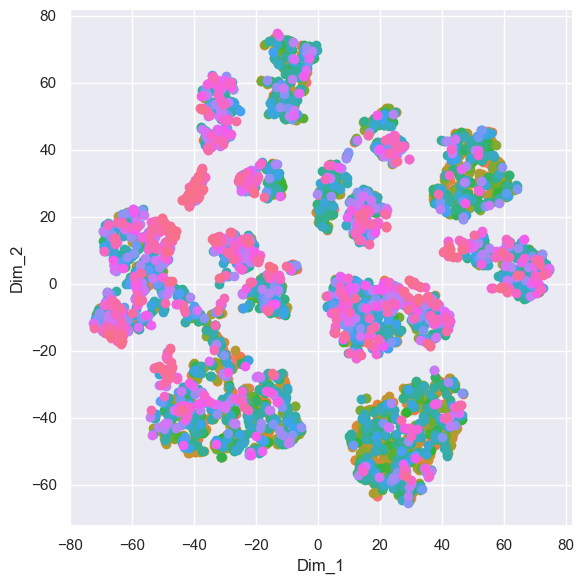

In [76]:
# t-SNE using Scikit-Learn

# Apply t-SNE with perplexity = 30
xtsne = TSNE(perplexity=30, random_state=0)
results = xtsne.fit_transform(std_sample_data)

# Prepare the DataFrame
tsne_df = pd.DataFrame(
    data=np.column_stack((results, sample_data_y)),
    columns=["Dim_1", "Dim_2", "label"]
)

# Plotting the result
sns.FacetGrid(tsne_df, hue="label", height=6).map_dataframe(plt.scatter, "Dim_1", "Dim_2")
plt.show()

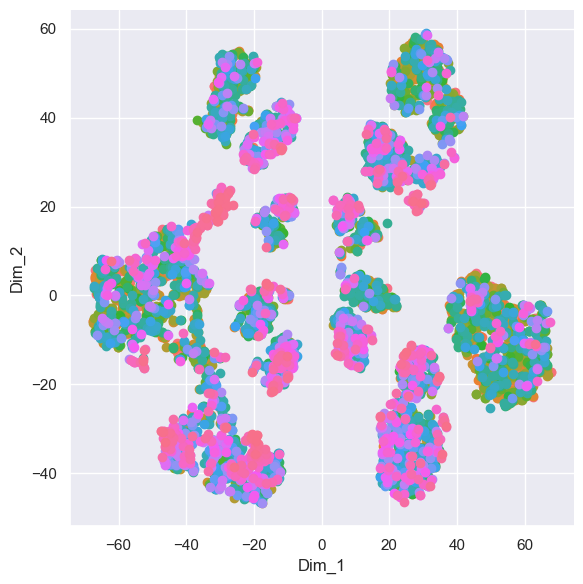

In [77]:
# Apply t-SNE with perplexity = 50
xtsne = TSNE(perplexity=50, random_state=0)
results = xtsne.fit_transform(std_sample_data)

# Prepare the DataFrame
tsne_df = pd.DataFrame(
    data=np.column_stack((results, sample_data_y)),
    columns=["Dim_1", "Dim_2", "label"]
)

# Plotting the result of t-SNE
sns.FacetGrid(tsne_df, hue="label", height=6).map_dataframe(plt.scatter, "Dim_1", "Dim_2")
plt.show()

Observation based on above t-SNE:
* Perplexity 30 spread the Sales wider, and more groups
* Perplexity 50 spread the Sales closer, and lesser groups

In [78]:
# PCA using Scikit-Learn

# initializing the pca
pca = decomposition.PCA()

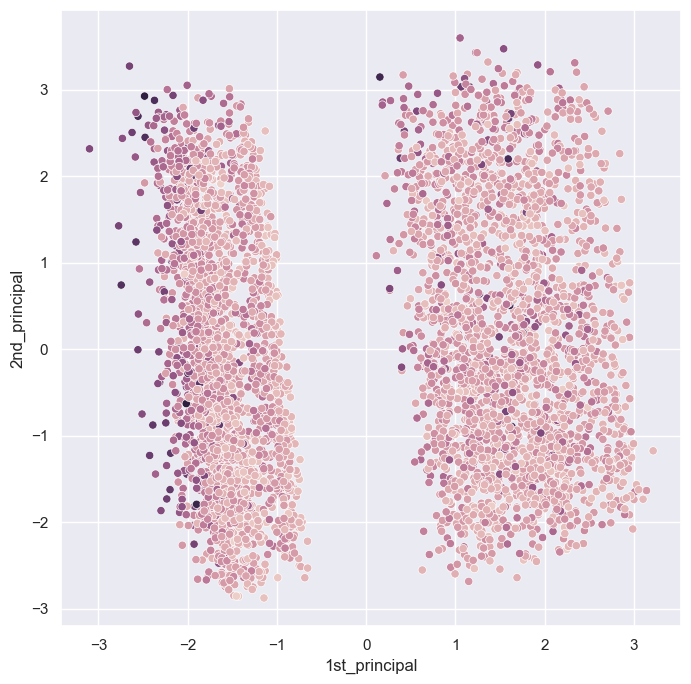

In [79]:
pca.n_components = 2
pca_data = pca.fit_transform(std_sample_data)

# attaching the label for each 2-d data point
pca_data = np.column_stack((pca_data, sample_data_y))

# creating a new data fram which help us in ploting the result data
figsize = (8, 8)
plt.figure(figsize=figsize)
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.scatterplot(data=pca_df, x='1st_principal', y='2nd_principal', hue='label', legend=False)
plt.show()

In [80]:
pc_comps = ['PC1', 'PC2']
data_pca = pd.DataFrame(np.round(pca.components_[:2,:], 2), index=pc_comps, columns=sample_data_X.columns)
data_pca.T

,PC1,PC2
Store,0.03,0.03
DayOfWeek,0.02,-0.05
Customers,-0.16,0.08
Open,-0.00,0.00
Promo,-0.02,0.03
SchoolHoliday,-0.02,0.12
CompetitionDistance,-0.09,-0.03
CompetitionOpenSinceMonth,-0.14,-0.06
CompetitionOpenSinceYear,-0.16,-0.07
Promo2,0.57,0.06


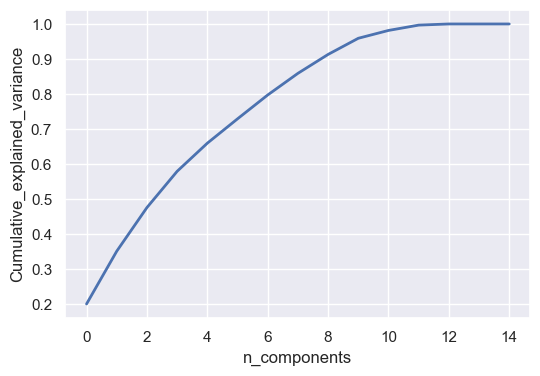

In [81]:
# pca for dimensionality redcution (non-visualization)
pca.n_components = 15
pca_data = pca.fit_transform(std_sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

# plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

Observations:
* More than 90% of the variance is explained by 10 features.
* Principal Component 1 is explained about the sales with less variance.
* Principal Component21 is explained about the sales with little more variance.

*Sales-Store Merged Data Analysis*

* Sales is more for StoreType 'b'. Average Sales also more for StoreType 'b'.
* Sales is more for Assortment 'b'. Average Sale also more for StoreType 'b'.
* With or Without Promo2, aroung 13% difference in Average sales. With Promo2, Average Sales is more.
* Average Sales increases from 2013 to 2015, we have significant improvement in 2015 (we have data till July 31st).
* Sales and Customer features have some considerable Correlation (.89).
* Sales and Open features have some Correlation (.68).
* Sales and Promo features have some Correlation (0.45).
* Correlation between DayOfWeek and Sales/Customers/Open/Promo is negative. features have some considerable Correlation
* CompetitionDistance is null for 3 Stores, can be considered as no competetors for those 3 stores. Replace nan with mean value of CompetitionDistance.

## <font color="chillipepper">**Feature Engineering**</font>

Existing Features:

* Store
* DayOfWeek
* Sales
* StoreType
* Assortment
* StateHoliday
* PromoInterval
* Customers
* SchoolHoliday
* CompetitionDistance
* CompetitionOpenSinceYear
* CompetitionOpenSinceMonth
* Promo
* Promo2
* Promo2SinceYear
* Promo2SinceWeek
* Year
* Week
* Month

Added Features:

* Custom Features, Competition/Promo related
* Aggregated-statistical Sales Features
* Lags' Features
* Encoding categorical features/Skew-Transformation for numerical values

Removing Existing/Temporay Features:

* Open, etc

In [82]:
sales_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842936 entries, 842935 to 0
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      842936 non-null  int64         
 1   DayOfWeek                  842936 non-null  int64         
 2   Date                       842936 non-null  datetime64[ns]
 3   Sales                      842936 non-null  int64         
 4   Customers                  842936 non-null  int64         
 5   Open                       842936 non-null  int64         
 6   Promo                      842936 non-null  int64         
 7   StateHoliday               842936 non-null  object        
 8   SchoolHoliday              842936 non-null  int64         
 9   StoreType                  842936 non-null  object        
 10  Assortment                 842936 non-null  object        
 11  CompetitionDistance        842936 non-null  float64      

In [83]:
# Competition-related Feature

sales_store_df['CompetitionOpenDuration'] = 0

for index, row in sales_store_df.iterrows():
    if row['CompetitionOpenSinceYear'] != 0 and row['CompetitionOpenSinceMonth'] != 0:
        # Calculate the difference in years and months
        years_diff = row['Year'] - row['CompetitionOpenSinceYear']
        months_diff = row['Month'] - row['CompetitionOpenSinceMonth']

        # Convert the difference to total months
        total_months = years_diff * 12 + months_diff

        # Ensure the duration is not negative
        sales_store_df.loc[index, 'CompetitionOpenDuration'] = max(0, total_months)

In [84]:
# Statistical-Aggregated Store-level Features

# AvgSalesPerStore, AvgCustomersPerStore
sales_store_df['AvgSalesPerStore'] = (sales_store_df.groupby('Store')['Sales'].expanding().mean().shift(1)
                                      .reset_index(level=0, drop=True))
sales_store_df['AvgCustomersPerStore'] = (sales_store_df.groupby('Store')['Customers'].expanding().mean().shift(1)
                                      .reset_index(level=0, drop=True))

# MedSalesPerStore, MedCustomersPerStore
sales_store_df['MedSalesPerStore'] = (sales_store_df.groupby('Store')['Sales'].expanding().median().shift(1)
                                      .reset_index(level=0, drop=True))
sales_store_df['MedCustomersPerStore'] = (sales_store_df.groupby('Store')['Customers'].expanding().median().shift(1)
                                      .reset_index(level=0, drop=True))

In [85]:
# lag Features

sales_store_df['LastDaySalesPerStore'] = sales_store_df.groupby('Store')['Sales'].shift(1)
sales_store_df['Last2DaysSalesPerStore'] = sales_store_df.groupby('Store')['Sales'].shift(2)

sales_store_df['LastDayCustomersPerStore'] = sales_store_df.groupby('Store')['Customers'].shift(1)
sales_store_df['Last2DaysCustomersPerStore'] = sales_store_df.groupby('Store')['Customers'].shift(2)

sales_store_df['LastWeekSalesPerStore'] = sales_store_df.groupby('Store')['Sales'].shift(7)
sales_store_df['LastWeekCustomersPerStore'] = sales_store_df.groupby('Store')['Customers'].shift(7)

In [87]:
# Compute AvgCustSpentInStore

sales_store_df['Store_AvgCustSpent_Trend'] = (
    sales_store_df
    .groupby('Store')[['Sales', 'Customers']]
    .apply(lambda g: (g['Sales'] / g['Customers'])
           .rolling(30, min_periods=1)
           .mean()
           .shift(1))
    .reset_index(level=0, drop=True)
)

In [88]:
sales_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842936 entries, 842935 to 0
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Store                       842936 non-null  int64         
 1   DayOfWeek                   842936 non-null  int64         
 2   Date                        842936 non-null  datetime64[ns]
 3   Sales                       842936 non-null  int64         
 4   Customers                   842936 non-null  int64         
 5   Open                        842936 non-null  int64         
 6   Promo                       842936 non-null  int64         
 7   StateHoliday                842936 non-null  object        
 8   SchoolHoliday               842936 non-null  int64         
 9   StoreType                   842936 non-null  object        
 10  Assortment                  842936 non-null  object        
 11  CompetitionDistance         842936 non-null 

In [89]:
# Dropping Features
sales_store_df = sales_store_df.drop(['Open', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis=1)

In [90]:
# sorting by date
sales_store_df = sales_store_df.sort_values(by='Date')

In [91]:
sales_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842936 entries, 842935 to 0
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Store                       842936 non-null  int64         
 1   DayOfWeek                   842936 non-null  int64         
 2   Date                        842936 non-null  datetime64[ns]
 3   Sales                       842936 non-null  int64         
 4   Customers                   842936 non-null  int64         
 5   Promo                       842936 non-null  int64         
 6   StateHoliday                842936 non-null  object        
 7   SchoolHoliday               842936 non-null  int64         
 8   StoreType                   842936 non-null  object        
 9   Assortment                  842936 non-null  object        
 10  CompetitionDistance         842936 non-null  float64       
 11  Promo2                      842936 non-null 

In [92]:
sales_store_df = sales_store_df.reset_index(drop=True)

In [93]:
sales_store_df.to_csv('Rossmann_Sales.csv', index=False)